## MSDS 432 - Programming Assignment #3 Dan Avni

## Executive Summary

The.


## Method and Conclusions

To demonstrate.

<img src="./runtime1.png">

## Implementation

In [18]:
#import required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

In [23]:
# recursuve facorial implemntation adapted retrieved from:
# https://github.com/egonSchiele/grokking_algorithms/blob/master/02_selection_sort/python/01_selection_sort.py

def recursive_fact(x):
  if x == 1:
    return 1
  else:
    return x * recusive_fact(x-1)

In [11]:
# iterative factorial solution u

def iterative_fact(x):
  fact = 1
  for i in range(1,x+1):
    fact = fact * i
  return fact

In [85]:
#unit test validation of the factorial implementation

print(recursive_fact(7))
print(iterative_fact(7))
print(recursive_fact(7)==iterative_fact(7))

5040
5040
True


In [86]:
#utility function to generate and array of uniformly distributed data array with persistent seed across calls 
def generate_random_array(item_count, low, high):
    np.random.seed(666)
    
    return np.random.randint(low, high, item_count).tolist()

In [122]:
#prepare an array of all the desired data lengths
random_ints = np.sort(generate_random_array(10, 100, 500)).tolist()

#prepare an empty data frame with the desired column names
test_data_col_names = ['number', 'factorial', 'iterative_ms', 'recursive_ms']
test_data = pd.DataFrame(columns = test_data_col_names) 

In [123]:
#iterate over the possible lens, create test data for each length, and compture runtime length in milliseconds
for random_int in random_ints:
    start   = time.time()
    fact1   = iterative_fact(random_int)
    iterative_ms = (time.time() - start) * 1000

    start   = time.time()
    fact2    = recursive_fact(random_int)
    recursive_ms = (time.time() - start) * 1000
    
    if fact1 != fact2:
        raise Exception('This should never have happened. The two methods should concur!')
    
    #insert the results into a new dataframe record 
    #need to cast the factorial into a string to prevent a pandas float or int overflow
    test_data.loc[len(test_data)] = [random_int, str(fact1), iterative_ms, recursive_ms]

Below is a tabular representation of the test data. It is useful as the charts fail to show the minute fluctuations in the binary search performance. To get a true read of the binary search performance we will need to run multiple tests and average the results, as well as increase the size. We should also try to execute the code in a virtualized environment where the CPU is under competition from other processes.

In [124]:
#plain text data dump of the test results
test_data

,number,factorial,iterative_ms,recursive_ms
0,151,8627209774233240431623188626544191544816225903...,0.021935,0.056982
1,160,4714723635992061322406943211761943779511926230...,0.024319,0.048161
2,170,7257415615307998967396728211129263114716991681...,0.038624,0.082016
3,191,1848941630973752588819559184291528260234868800...,0.040531,0.209808
4,256,8578177753428426541190822716812326251577815202...,0.061035,0.150442
5,322,2187246741752763751432688247998659781970331487...,0.062466,0.448704
6,323,7064806975861426917127583041035671095764170704...,0.154018,0.303745
7,336,3885246413919554674957188781709166666213058911...,0.058174,0.246286
8,418,6704355013599149103015045905466432364040846480...,0.093460,0.263453
9,486,2402100606040589897197638086812797478301774839...,0.078678,0.475645


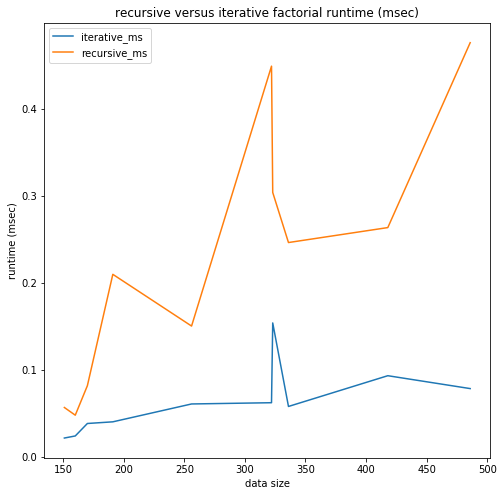

In [126]:
#plot the binary and linear search results against the data length
plt.figure(figsize=(8,8))

plt.plot(test_data.number, test_data.iterative_ms)
plt.plot(test_data.number, test_data.recursive_ms)

plt.legend()
plt.xlabel('data size')
plt.ylabel('runtime (msec)')
plt.title('recursive versus iterative factorial runtime (msec)')
plt.show()

## Extra Credit

A GitHub reposotory contaning commits for all the maerials in the assignemt was shared and made available here:

https://github.com/dannyavni/MSDS_432